# Part II - FordGoBike Bike-Share Services 
## by Daisy Vukania

## Investigation Overview

Popularity and Use of the Bike-Share system based on the following;

Peak time travel information

Types of memberships

Age of patrons

Gender of the patrons

Locations for the assessing the Bike-Share system for users, casual (customers) or regular (subscribers), of the service.


## Dataset Overview

This data set includes information about individual rides made using the Ford GoBike bike-sharing system in the greater San Francisco Bay area. 
the dataset contains information about bike trips, including the duration and distance of each trip, the day of the week the trip was taken, the start and end date and time, the bike ID, the type of membership, the gender of the user, the age of the user, and the start and end stations. The data has 183,215 rows and 16 columns.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike_share = pd.read_csv('wrangled_201902_fordgobike_tripdata.csv')

## Types of FordGoBike Memberships by Demographical Data.

Majority of bike share trips are taken by male subscribers aged between 18 and 50 years old. Also, female subscribers have a lower number of trips compared to males across all age groups. Customers, who are not members, are generally younger than subscribers, and are mostly female.

Insights into the demographics of bike share users, aids in making data-driven decisions on marketing and outreach efforts. 
Understanding the characteristics of different user groups, bike share companies allows for tailoring services and promotions targeted at attracting more customers and increase subscriptions. 

Discounts and other offers targeted at increasing female membership and promoting bike share as a mode of transportation for older adults, may be considered. 
Policymakers and city planners also use the information needed to make more informed decisions about bike infrastructure and transportation policies.


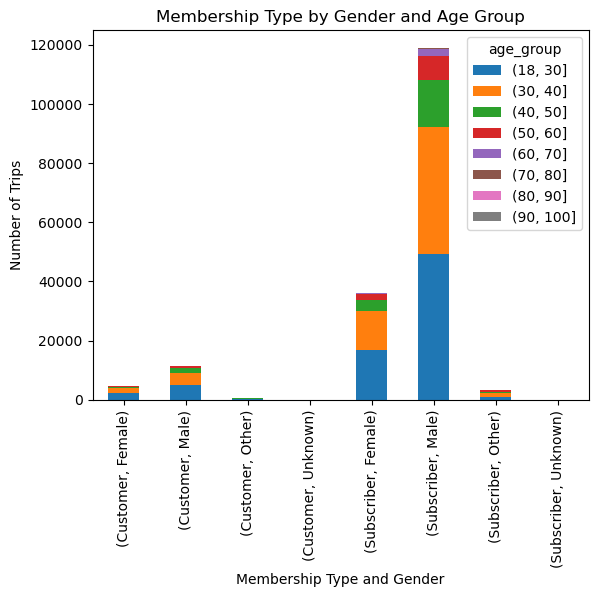

In [3]:
# Creating a new column for age group
bike_share['age_group'] = pd.cut(bike_share['age'], bins=[18, 30, 40, 50, 60, 70, 80, 90, 100])

# Grouping by membership type, gender, and age group
grouped = bike_share.groupby(['membership_type', 'gender', 'age_group']).size().reset_index(name='count')

# Pivot the table for plotting
pivot_df = grouped.pivot(index=['membership_type', 'gender'], columns='age_group', values='count')

# Creating stacked bar chart
pivot_df.plot(kind='bar', stacked=True)

# add labels and title
plt.title('Membership Type by Gender and Age Group')
plt.xlabel('Membership Type and Gender')
plt.ylabel('Number of Trips')

# show plot
plt.show();

## Daily Average Trip Data. 

The two plots provide insight into how trip duration and distance vary throughout the day and  shows the peak hours for the bike-share service.

The top plot shows that the average trip duration is highest in the early morning hours (between 2 am - 4 am). It decreases gradually through the day to about mid-afternoon (11 am - 3 pm), and flactuates through the evening hours (between 6 pm - 10 pm), and then, it peaks again towards midnight (after 10 pm). This could be due to commuters traveling to and from work or school, exercise routines, as well as individuals going out at night.

The bottom plot shows that the average trip distance is highest in the early morning hours (between 3 am - 1 pm) and in the late evening hours (between 2 pm -8 pm). This may be due to longer commutes being taken during these times, such as errand runs, exercise routes or longer recreational rides.

Bike-sharing companies understand the usage patterns of their customers and optimize their operations accordingly. A company, for instance, could adjust bike-availability at different stations based on the usage patterns during different peak hours of the day. Additionally, they can use this information to tailor their marketing efforts to target different groups of users based on their usage patterns.


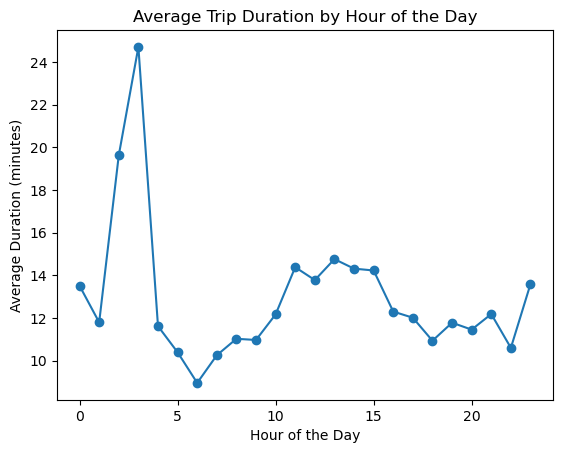

In [4]:
# Creating a lineplot for the duration comparison
avg_duration_by_hour = bike_share.groupby('trip_start_hour')['trip_duration'].mean()
plt.plot(avg_duration_by_hour, marker='o')
plt.title('Average Trip Duration by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Duration (minutes)')
plt.show();


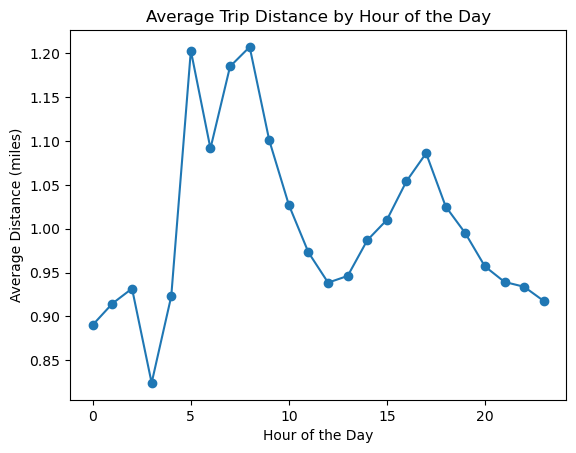

In [5]:
# Creating a lineplot for the distance comparison
avg_duration_by_hour = bike_share.groupby('trip_start_hour')['trip_distance'].mean()
plt.plot(avg_duration_by_hour, marker='o')
plt.title('Average Trip Distance by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Distance (miles)')
plt.show();

## Data on Docking Stations Around the City. 

The top left plot shows the top 10 start stations for subscribers, while the top right plot shows the top 10 end stations for subscribers. The bottom left plot shows the top 10 start stations for customers, while the bottom right plot shows the top 10 end stations for customers.

Subscribers have a higher usage of start and end stations compared to customers. 
Most trips for subscribers start and end at the same station.
For customers, there is a higher number of trips starting and ending at different stations.
Certain start and end stations are more popular among subscribers compared to customers.

Identifying the most popular start and end stations for both types of users, can ensure bike share companies optimize their operations by proper maintenance, sufficiently stocked docking stations to handle the user traffic. Additionally, this analysis can help identify areas for marketing and on-boarding new customers. 


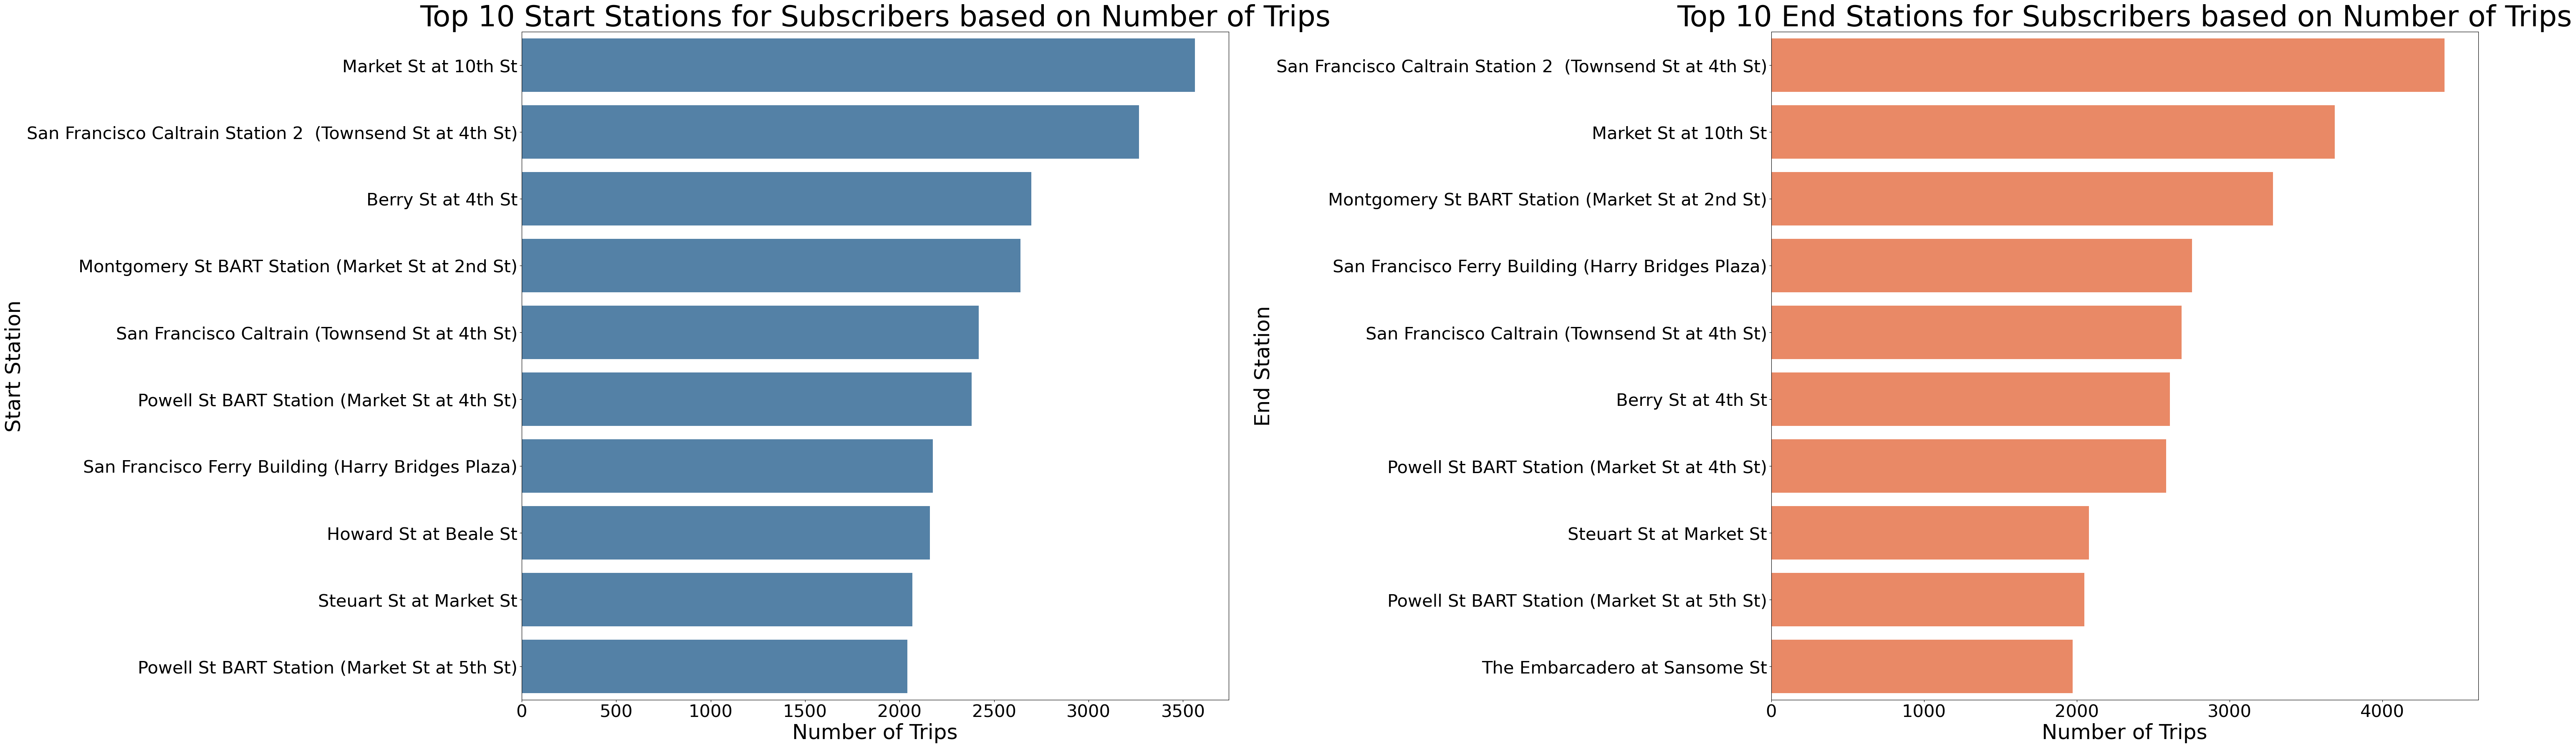

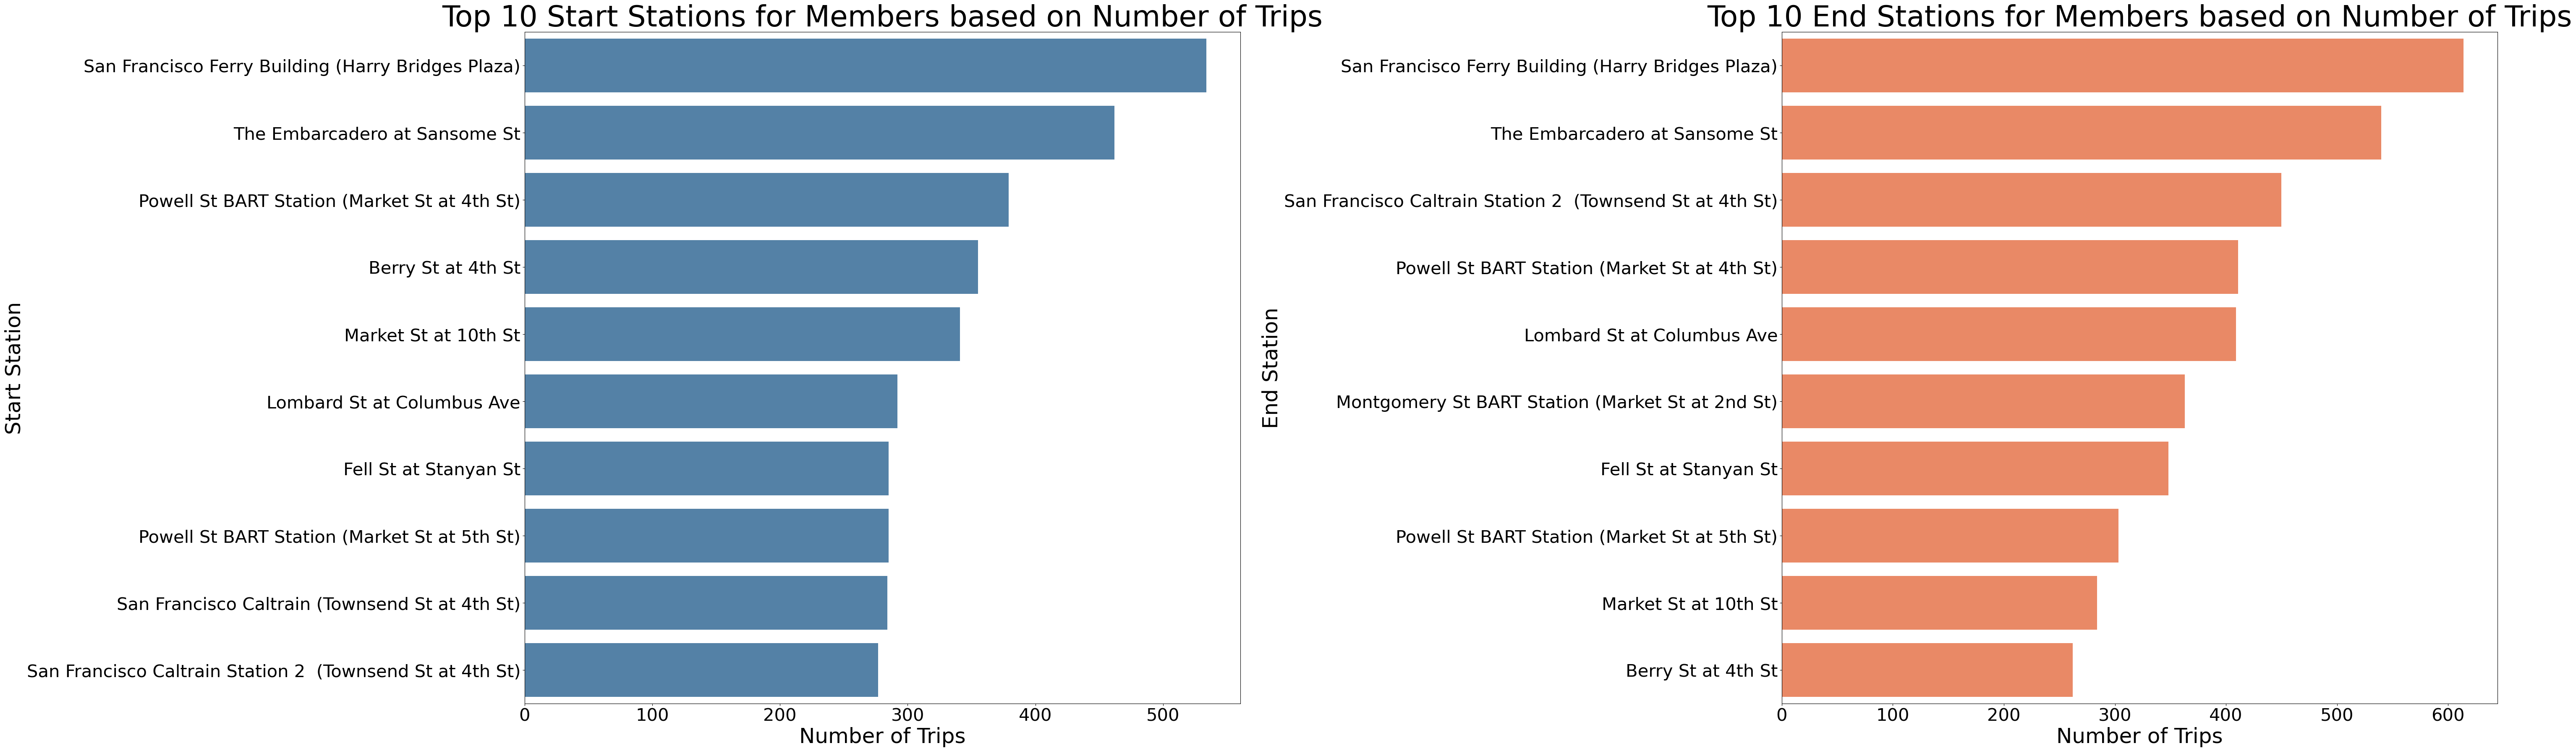

In [6]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(60, 18))
plt.subplots_adjust(wspace=200, hspace=200)

# top 10 start stations for casual users
start_stations_casual_top10 = bike_share[bike_share['membership_type'] == 'Subscriber']['start_station'].value_counts().nlargest(10)
sb.barplot(x=start_stations_casual_top10.values, y=start_stations_casual_top10.index, color='steelblue', ax=axes[0])
axes[0].tick_params(axis='both', which='major', labelsize=30)
axes[0].set_xlabel('Number of Trips', fontsize=36)
axes[0].set_ylabel('Start Station', fontsize=36)
axes[0].set_title('Top 10 Start Stations for Subscribers based on Number of Trips', fontsize=50)

# top 10 end stations for casual users
end_stations_casual_top10 = bike_share[bike_share['membership_type'] == 'Subscriber']['end_station'].value_counts().nlargest(10)
sb.barplot(x=end_stations_casual_top10.values, y=end_stations_casual_top10.index, color='coral', ax=axes[1])
axes[1].tick_params(axis='both', which='major', labelsize=30)
axes[1].set_xlabel('Number of Trips', fontsize=36)
axes[1].set_ylabel('End Station', fontsize=36)
axes[1].set_title('Top 10 End Stations for Subscribers based on Number of Trips', fontsize=50)

plt.tight_layout()
plt.show();


# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(60, 18))
plt.subplots_adjust(wspace=100, hspace=100)

# top 10 start stations for members
start_stations_member_top10 = bike_share[bike_share['membership_type'] == 'Customer']['start_station'].value_counts().nlargest(10)
sb.barplot(x=start_stations_member_top10.values, y=start_stations_member_top10.index, color='steelblue', ax=axes[0])
axes[0].tick_params(axis='both', which='major', labelsize=30)
axes[0].set_xlabel('Number of Trips', fontsize=36)
axes[0].set_ylabel('Start Station', fontsize=36)
axes[0].set_title('Top 10 Start Stations for Members based on Number of Trips', fontsize=50)

# top 10 end stations for members
end_stations_member_top10 = bike_share[bike_share['membership_type'] == 'Customer']['end_station'].value_counts().nlargest(10)
sb.barplot(x=end_stations_member_top10.values, y=end_stations_member_top10.index, color='coral', ax=axes[1])
axes[1].tick_params(axis='both', which='major', labelsize=30)
axes[1].set_xlabel('Number of Trips', fontsize=36)
axes[1].set_ylabel('End Station', fontsize=36)
axes[1].set_title('Top 10 End Stations for Members based on Number of Trips', fontsize=50)


plt.tight_layout()
plt.show();


In [ ]:
!jupyter nbconvert Part_II_slide_deck_presentation.ipynb --to slides --post serve --no-input --no-prompt